## V407 Cyg Brightness Temperature Work

In [1]:
#imports
import numpy as np
import pandas as pd
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
f1_4 = (
    [55289.7,    3.0,  1.4,  2.980,  0.500,  0.000,  0.050], #'AS1039',	'D']
    [55298.7,    5.0,  1.4,  4.040,  0.300,  0.000,  0.050], #'AS1039',	'D']
    [55301.7,    6.0,  1.4,  3.597,  0.330,  0.000,  0.050], #'AS1039',	'D']
    [55304.7 ,   7.0 , 1.4,  4.780,  0.300,  0.000,  0.050], #'AS1039',	'D]
    [55308.7  ,  8.0  ,1.4,  5.482,  0.300,  0.000,  0.050], #'AS1039',	'D']
    [55311.7  ,  9.0 , 1.4,  5.780,  0.320,  0.000,  0.050], #'AS1039',	'D']
    [55315.6,   10.0  ,1.4,  5.944, 0.260,  0.000,  0.050], #'AS1039',	'D']
    [55318.6,   11.0  ,1.4,  5.760, 0.280,  0.000,  0.050], #'AS1039',	'D']
    [55323.6,   12.0  ,1.4,  6.441,  0.300,  0.000,  0.050], #'AS1039',	'D']
    [55330.5 ,  13.0  ,1.4,  5.355,  0.280,  0.000,  0.050], #'AS1039',	'D']
    [55332.6 ,  14.0  ,1.4,  5.803,  0.280,  0.000,  0.050], #'AS1039',	'D']	
    [55341.6 ,  15.0  ,1.4,  5.853,  0.300,  0.000,  0.050], #'AS1039',	'D']
    [55345.6 ,  16.0  ,1.4,  5.828,  0.290,  0.000,  0.050], #'AS1039',	'D']
    [55362.5 ,  17.0,	1.4,  5.606,  0.260,  0.000,  0.050], #'AS1039',	'D']
    [55367.6,	  18.0,	1.4,  5.763,  0.330,  0.000,  0.050], #'AS1039',	'D']
    [55368.5,	  19.0,	1.4,  5.905,  0.290,  0.000,  0.050], #'AS1039',	'D']
    [55404.4 ,  20.0,  1.4,  6.917,  0.280,  0.000,  0.050], #'10B-233', 'D']
    [55419.4,	  21.0,	1.4,  7.924,  0.330,  0.000,  0.050],	#'10B-233', 'D']
    [55434.3,	  22.0,	1.4,  5.489,  0.260,  0.000,  0.050], #'10B-233', 'D']
    [55449.2,	  23.0, 	1.4,  5.608,  0.240,  0.000,  0.050], #'10B-233', 'D']
    [55469.2,	  24.0,	1.4,  5.582,  0.145,  0.000,  0.050],#'10B-233', 'DnC']

#and the 1.3 frequency as well
    [55625.4 ,  25.0 , 1.3,  4.220,  0.163,  0.000,  0.050], #'11A-254', 'B']
    [55735.4 ,  26.0,  1.3,  3.596,  0.081,  0.000,  0.050], #'11A-254', 'A']
    [55869.1 ,  27.0,  1.3,  3.642,  0.534,  0.000,  0.050], #'11B-170', 'D']
    [55934.8 ,  28.0,  1.3,  4.688,  1.020,  0.000,  0.050], #'11B-170', 'DnC *held width constant']
    [56035.4 ,  29.0,  1.3,  2.940,  0.301,  0.000,  0.050], #'11B-170', 'C']
# the 1.5 frequency 
    [55284.8,    2.0,  1.5, -0.124,  0.720,  0.000,  0.050]) #'AL733',   'D *non detection']

f1_8 = (
    #the 1.9 frequency
    [55284.8,    2.0,  1.9,  1.930,  0.525,  0.000,  0.050], #held width constant
    
    [55289.7,    3.0,  1.8,  3.469,  0.350,  0.000,  0.050],
    [55298.7,    5.0,  1.8,  4.762,  0.300,  0.000,  0.050],
    [55301.7,    6.0,  1.8,  5.466,  0.300,  0.000,  0.050],
    [55304.7,    7.0,  1.8,  5.512,  0.350,  0.000,  0.050],
    [55308.7,    8.0,  1.8,  6.662,  0.330,  0.000,  0.050],
    [55311.7,    9.0,  1.8,  6.841,  0.300,  0.000,  0.050],
    [55315.6,   10.0,  1.8,  7.376,  0.290,  0.000,  0.050],
    [55318.6 ,  11.0,  1.8,  7.478,  0.260,  0.000,  0.050],
    [55323.6,   12.0,  1.8,  7.657,  0.330,  0.000,  0.050],
    [55330.5,   13.0,  1.8,  6.651,  0.270,  0.000,  0.050],
    [55332.6,   14.0,  1.8,  7.574,  0.260,  0.000,  0.050],
    [55341.6,   15.0,  1.8,  8.049,  0.260,  0.000,  0.050],
    [55345.6,   16.0,  1.8,  7.532,  0.280,  0.000 , 0.050],
    [55362.5,   17.0,	1.8,  7.540,  0.240,  0.000,  0.050],
    [55367.6,	  18.0,  1.8,  7.811,  0.290,  0.000,  0.050],
    [55368.5,	  19.0,  1.8,  7.381,  0.260,  0.000,  0.050],
    [55404.4 ,  20.0,  1.8 , 8.225,  0.300,  0.000,  0.050],
    [55419.4,	  21.0,	1.8,  8.192 , 0.200,  0.000,  0.050],
    [55434.3,	  22.0,	1.8,  6.386,  0.240,  0.000,  0.050],
    [55449.2,	  23.0, 	1.8,  6.338,  0.160,  0.000,  0.050],
    [55469.2,	  24.0,	1.8,  5.532,  0.135,  0.000,  0.050],
    [55625.4,   25.0,  1.8,  4.644,  0.092,  0.000 , 0.050],
    [55735.4,   26.0,  1.8,  4.074,  0.068,  0.000,  0.050],
    [55869.1 ,  27.0,  1.8,  3.855,  0.291,  0.000,  0.050],
    [55934.8,   28.0,  1.8,  3.316,  0.554,  0.000,  0.050], #held width constant
    [56035.4,   29.0,  1.8,  3.347,  0.232,  0.000,  0.050],

    ) 


f4_8 = (
    #the frequency 5
    [55282.9,    1.0,  5.0,  6.389,  0.000,  0.150,  0.050],
    [55284.8,    2.0,  5.0,  7.034,  0.000,  0.104,  0.050],
    
    [55289.7,    3.0,  4.8,  6.880,  0.000,  0.130,  0.050],
    [55294.7,    4.0,  4.8,  8.990,  0.000,  0.130,  0.050],
    [55298.7,    5.0,  4.8, 10.680,  0.000,  0.110,  0.050],
    [55301.7,    6.0,  4.8, 12.363,  0.182,  0.051,  0.050],
    [55304.7,    7.0,  4.8, 12.792,  0.167,  0.039,  0.050],
    [55308.7,    8.0,  4.8, 13.690,  0.171,  0.034,  0.050],
    [55311.6,    9.0,  4.8, 13.964,  0.078,  0.014,  0.050],
    [55315.6,   10.0,  4.8, 13.673,  0.107,  0.027,  0.050],
    [55318.6,   11.0,  4.8, 13.135,  0.130,  0.028,  0.050],
    [55323.6,   12.0,  4.8, 14.160,  0.088,  0.016,  0.050],
    [55330.5,   13.0,  4.8, 15.023,  0.082,  0.023,  0.050],
    [55332.6,   14.0,  4.8, 15.479,  0.000,  0.155,  0.050],
    [55341.6,   15.0,  4.8, 17.395,  0.092,  0.032,  0.050],
    [55345.6,   16.0,  4.8, 17.465,  0.000,  0.165,  0.050],
    [55362.5,   17.0,  4.8, 17.255,  0.061,  0.016,  0.050],
    [55367.6,	  18.0,	4.8, 17.777,  0.145,  0.032,  0.050],	
    [55368.5,	  19.0,	4.8, 17.446,  0.000,  0.135,  0.050],
    [55404.4,   20.0,  4.8, 12.926,  0.083,  0.022,  0.050],
    [55419.3,	  21.0,	4.8, 11.805,  0.118,  0.018,  0.050],
    [55434.3,	  22.0,	4.8, 10.785,  0.100,  0.018,  0.050],
    [55449.2,	  23.0,  4.8,  9.979,  0.115,  0.024,  0.050],
    [55469.2,	  24.0,	4.8,  9.173,  0.074,  0.000,  0.050], 

    
    [55625.4,   25.0,  5.0,  5.003,  0.000,  0.027,  0.050],
    [55735.4,   26.0,  5.0,  3.270,  0.000,  0.029,  0.050],
    [55869.1,   27.0,  5.0,  3.542,  0.000,  0.036,  0.050],
    [55934.8,   28.0,  5.0,  3.212,  0.055,  0.000,  0.050],
    [56035.4,   29.0,  5.0,  2.913,  0.028,  0.000,  0.050])

f7_4 = (   
    #THE FREQ 7
    [55289.7,    3.0,  7.0,  8.810,  0.000,  0.110,  0.050],
    [55294.7,    4.0,  7.0, 11.880,  0.000,  0.080,  0.050],
    [55298.7,    5.0,  7.0, 12.870,  0.000,  0.140,  0.050],
    [55301.7,    6.0,  7.0, 14.670,  0.111,  0.032,  0.050],
    [55304.7,    7.0,  7.0, 15.586,  0.145,  0.050,  0.050],
    [55308.7,    8.0,  7.0, 15.718,  0.108,  0.037,  0.050],
    [55311.6,    9.0,  7.0, 16.072,  0.071,  0.029,  0.050],
    [55315.6,   10.0,  7.0, 16.882,  0.087,  0.038,  0.050],
    [55318.6,   11.0,  7.0, 16.103,  0.089,  0.036,  0.050],
    [55323.6,   12.0,  7.0, 17.178,  0.055,  0.019,  0.050],

    #THE FREQ 7.9
    [55330.5,   13.0,  7.9, 19.175,  0.056,  0.013,  0.050],
    [55332.6,   14.0,  7.9, 19.876,  0.000,  0.133,  0.050],
    [55341.6,   15.0,  7.9, 21.710,  0.080,  0.030,  0.050],
    [55345.6,   16.0,  7.9, 20.618,  0.000,  0.154,  0.050],
    [55362.5,   17.0,  7.9, 20.190,  0.065,  0.009,  0.050],
    [55367.6,	  18.0,	7.9, 19.022,  0.068,  0.015,  0.050],	
    [55368.5,	  19.0,	7.9, 18.301,  0.000,  0.182,  0.050],
    [55404.4,   20.0,  7.9, 14.569,  0.082,  0.017,  0.050],
    [55419.3,	  21.0,	7.9, 12.923,  0.069,  0.013,  0.050],
    [55434.3,	  22.0,	7.9, 11.313,  0.041,  0.009,  0.050],
    [55449.2,	  23.0,	7.9, 10.158,  0.066,  0.012,  0.050],
    [55469.2,	  24.0,	7.9,  9.102,  0.062,  0.000,  0.050],

    #THE FREQ 7.4
    [55625.4,   25.0,  7.4,  4.813,  0.000,  0.023,  0.050],
    [55735.4,   26.0,  7.4,  2.752,  0.000,  0.033,  0.050], 
    [55869.1,   27.0,  7.4,  3.494,  0.000,  0.029,  0.050],
    [55934.8,   28.0,  7.4,  3.154,  0.025,  0.000,  0.050],
    [56035.4,   29.0,  7.4, 2.803,  0.020,  0.000,  0.050],

    #[55277.5   -2.0  8.4  8.500  0.000  0.800  0.200]  #from Effelsberg, ATel 2506
    #[55282.5   -1.0  6.4  8.900  0.000  1.000  0.200]  #from ATA, Atel 2529
)

f19 = (
    [55289.7,    3.0, 19.0, 20.486,  0.075,  0.004,  0.100],
    [55294.6,    4.0, 19.0, 23.654,  0.056,  0.003,  0.100],
    [55298.6,    5.0, 19.0, 29.126,  0.069,  0.005,  0.100],
    [55301.6,    6.0, 19.0, 30.900,  0.084,  0.006,  0.100],
    [55304.7,    7.0, 19.0, 29.153,  0.114,  0.018,  0.100],
    [55308.6,    8.0, 19.0, 28.913,  0.246,  0.016,  0.100],
    [55311.6,    9.0, 19.0, 30.382,  0.072,  0.011,  0.100],
    [55315.6,   10.0, 19.0, 33.032,  0.095,  0.011,  0.100],
    [55318.6,   11.0, 19.0, 29.067,  0.108,  0.018,  0.100],
    [55323.6,   12.0, 19.0, 27.774,  0.079,  0.014,  0.100],
    [55327.6,   13.0, 19.0, 28.251,  0.073,  0.010,  0.100],
    [55332.5,   14.0, 19.0, 28.752,  0.089,  0.012,  0.100],
    [55341.5,	  15.0, 19.0, 28.360,  0.082,  0.013,  0.100],
    [55345.5,   16.0, 19.0, 26.717,  0.074,  0.016,  0.100],
    [55368.5,	  19.0, 19.0, 23.036,  0.106,  0.013,  0.100],
    [55404.3,   20.0, 19.0, 14.867,  0.137,  0.013,  0.100],
    [55419.4,	  21.0, 19.0, 13.256,  0.092,  0.008,  0.100],
    [55434.3,	  22.0, 19.0, 11.867,  0.089,  0.010,  0.100],
    [55449.3,	  23.0, 19.0, 10.008,  0.080,  0.011,  0.100],
    [55469.2,	  24.0, 19.0,  9.864,  0.066,  0.059,  0.100],

    #The freq 20.1
    [55625.4,   25.0, 20.1,  4.652,  0.033,  0.000,  0.100],
    [55735.4,	  26.0, 20.1,  2.542,  0.040,  0.000,  0.100],
    [55869.1,   27.0, 20.1,  3.672,  0.000,  0.038,  0.100],
    [55934.8,   28.0, 20.1,  3.140,  0.047,  0.000,  0.100],
    [56035.4,   29.0, 20.1,  2.914,  0.040,  0.000,  0.100],)

f25 = (
    [55289.7,    3.0, 25.0, 24.545,  0.055,  0.004,  0.100],
    [55294.6,    4.0, 25.0, 27.706,  0.065,  0.005,  0.100],
    [55298.6,    5.0, 25.0, 35.279,  0.054,  0.006,  0.100],
    [55301.6,    6.0, 25.0, 37.236,  0.074,  0.006,  0.100],
    [55304.7,    7.0, 25.0, 34.345,  0.193,  0.038,  0.100],
    [55308.6,    8.0, 25.0, 30.322,  0.323,  0.025,  0.100],
    [55311.6,    9.0, 25.0, 33.856,  0.053,  0.010,  0.100],
    [55315.6,   10.0, 25.0, 37.507,  0.070,  0.014,  0.100],
    [55318.6,   11.0, 25.0, 34.754,  0.079,  0.015,  0.100],
    [55323.6,   12.0, 25.0, 29.494,  0.060,  0.014,  0.100],
    [55327.6,   13.0, 25.0, 30.309,  0.081,  0.013,  0.100],
    [55332.5,   14.0, 25.0, 29.247,  0.062,  0.012,  0.100],
    [55341.5,	  15.0, 25.0, 28.799,  0.053,  0.011,  0.100],
    [55345.5,   16.0, 25.0, 27.507,  0.084,  0.015,  0.100],
    [55368.5,	  19.0, 25.0, 22.468,  0.062,  0.011,  0.100],
    [55404.3,   20.0, 25.0, 13.636,  0.105,  0.015,  0.100],
    [55419.4,	  21.0, 25.0, 13.297,  0.084,  0.013,  0.100],
    [55434.3,	  22.0, 25.0, 11.200,  0.055,  0.008,  0.100],
    [55449.3,	  23.0, 25.0,  9.506,  0.081,  0.020,  0.100],
    [55469.2,	  24.0, 25.0, 10.082,  0.068,  0.066,  0.100],

    #The freq 25.6
    [55625.4,   25.0, 25.6,  4.744,  0.033,  0.000,  0.100],
    [55735.4,	  26.0, 25.6,  2.620,  0.048,  0.000,  0.100],
    [55869.1,   27.0, 25.6,  3.828,  0.000,  0.047,  0.100],
    [55934.8,   28.0, 25.6,  2.992,  0.057,  0.000,  0.100],
    [56035.4,   29.0, 25.6,  2.970,  0.052,  0.000,  0.100])

f41 = (
    [55298.7,    5.0, 41.0, 59.890,  0.000, 0.890,  0.200],
    [55327.6,   13.0, 41.0, 51.340,  0.000,  0.750,  0.200],
    [55332.5,   14.0, 41.0, 44.900,  0.000,  0.620,  0.200],
    [55341.5,   15.0, 41.0, 39.970,  0.000,  0.560,  0.200],
    [55345.5,   16.0, 41.0, 37.050,  0.000,  0.570,  0.200],
    [55368.5,	  19.0, 41.0, 25.944,  0.000,  0.646,  0.200],
    [55404.3,	  20.0, 41.0, 18.670,  0.000,  0.831,  0.200],
    [55419.4,	  21.0, 41.0, 12.392,  0.000,  0.479,  0.200],
    [55434.3,	  22.0, 41.0, 14.580,  0.000,  0.586,  0.200],
    [55449.3,	  23.0, 41.0,  9.662,  0.000,  0.845,  0.200],
    [55469.2,	  24.0, 41.0, 14.189,  0.000,  0.640,  0.200],
    [55625.4,   25.0, 41.0,  5.303,  0.000,  0.181,  0.200],
    [55735.4,   26.0, 41.0,  4.249,  0.000,  0.171,  0.200],
    [55869.1,   27.0, 41.0,  4.323,  0.000,  0.124,  0.200],
    [55934.8,   28.0, 41.0,  3.959,  0.000,  0.232,  0.200],
    [56035.4,   29.0, 41.0,  2.879,  0.000,  0.165,  0.200])

f45 = (
    [55298.7,    5.0, 45.0, 65.630,  0.000,  1.160,  0.200],
    [55327.6,   13.0, 45.0, 50.660,  0.000,  0.750,  0.200],
    [55332.5,   14.0, 45.0, 46.310,  0.000,  0.620,  0.200],
    [55341.5,   15.0, 45.0, 38.400,  0.000,  0.640,  0.200],
    [55345.5,   16.0, 45.0, 35.880,  0.000,  0.600,  0.200],
    [55368.5,	  19.0, 45.0, 28.133,  0.000,  0.771,  0.200],
    [55404.3,	  20.0, 45.0, 18.608,  0.000,  0.972,  0.200],
    [55419.4,	  21.0, 45.0, 13.509,  0.000,  0.522,  0.200],
    [55434.3,	  22.0, 45.0, 15.120,  0.000,  0.595,  0.200],
    [55449.3,	  23.0, 45.0,  9.093,  0.000,  0.783,  0.200],
    [55469.2,	  24.0, 45.0, 12.754,  0.000,  0.689,  0.200],
    [55625.4,   25.0, 45.0,  5.445,  0.000,  0.238,  0.200],
    [55735.4,   26.0, 45.0,  4.445,  0.000,  0.237,  0.200],
    [55869.1,   27.0, 45.0,  4.466,  0.000,  0.162,  0.200],
    [55934.8,   28.0, 45.0,  5.225,  0.000,  0.373,  0.200],
    [56035.4,   29.0, 45.0,  2.660,  0.000,  0.247,  0.200])

    #[55289.7    3.0 49.0 44.980  0.000  1.590  0.500]
    #[55308.6    6.0 49.0 82.500  0.000  0.000  0.200]  

f12_1 = (
    #the frequency 15
    [55277.5,   -1.0, 15.00, 24.10,  0.000,  1.700,  0.100],
    #the frequency 14.6
    [55277.5,   -1.0, 14.60, 14.60,  0.000,  1.200,  0.100],
    #rge freq 10.45
    [55277.5,   -1.0, 10.45, 11.60,  0.000,  0.900,  0.100],
    #the frew 8.35 
    [55277.5,   -1.0,  8.35, 8.500,  0.000,  0.800,  0.100], # ATel 2506
   )

f142 = (
    [55277.5,   -1.0, 142.0, 146.0,  0.000,  51.00,  0.100],)


In [3]:

df_1_4 = pd.DataFrame(f1_4, columns = ["MJD","Epoch","Freq","Flux","Error1 (gaussfit)","Error2 (image)","Error3 (calibration) (%)",])

df_1_8 = pd.DataFrame(f1_8, columns = ["MJD","Epoch","Freq","Flux","Error1 (gaussfit)","Error2 (image)","Error3 (calibration) (%)",])

df_4_8 = pd.DataFrame(f4_8, columns = ["MJD","Epoch","Freq","Flux","Error1 (gaussfit)","Error2 (image)","Error3 (calibration) (%)",])

df_7_4 = pd.DataFrame(f7_4, columns = ["MJD","Epoch","Freq","Flux","Error1 (gaussfit)","Error2 (image)","Error3 (calibration) (%)",])

df_19 = pd.DataFrame(f19, columns = ["MJD","Epoch","Freq","Flux","Error1 (gaussfit)","Error2 (image)","Error3 (calibration) (%)",])

df_25 = pd.DataFrame(f25, columns = ["MJD","Epoch","Freq","Flux","Error1 (gaussfit)","Error2 (image)","Error3 (calibration) (%)",])

df_41 = pd.DataFrame(f41, columns = ["MJD","Epoch","Freq","Flux","Error1 (gaussfit)","Error2 (image)","Error3 (calibration) (%)",])

df_45 = pd.DataFrame(f45, columns = ["MJD","Epoch","Freq","Flux","Error1 (gaussfit)","Error2 (image)","Error3 (calibration) (%)",])

df_12_1 = pd.DataFrame(f12_1, columns = ["MJD","Epoch","Freq","Flux","Error1 (gaussfit)","Error2 (image)","Error3 (calibration) (%)",])

df_142 = pd.DataFrame(f142, columns = ["MJD","Epoch","Freq","Flux","Error1 (gaussfit)","Error2 (image)","Error3 (calibration) (%)",])

In [4]:
mask1 = df_1_8['Flux'] > 3 * df_1_8['Error1 (gaussfit)'] #don't show the non-detections
if mask1.any():
        days1_8 = (df_1_8['MJD'] - 55265.8)
        flux1_8 = df_1_8["Flux"]
        flux_err1_8 = np.sqrt(df_1_8["Error1 (gaussfit)"]**2 + (df_1_8["Flux"]*0.05)**2)

mask2 = df_4_8['Flux'] > 3 * df_4_8['Error1 (gaussfit)'] #don't show the non-detections
if mask2.any():
        days4_8 = (df_4_8['MJD'] - 55265.8)
        flux4_8 = df_4_8["Flux"]
        flux_err4_8 = np.sqrt(df_4_8["Error1 (gaussfit)"]**2 + (df_4_8["Flux"]*0.05)**2)

mask3 = df_19['Flux'] > 3 * df_19['Error1 (gaussfit)'] #don't show the non-detections
if mask3.any():
        days19 = (df_19['MJD'] - 55265.8)
        flux19 = df_19["Flux"]
        flux_err19 = np.sqrt(df_19["Error1 (gaussfit)"]**2 + (df_19["Flux"]*0.1)**2)


mask1 = df_41['Flux'] > 3 * df_41['Error1 (gaussfit)'] #don't show the non-detections
if mask1.any():
        days41 = (df_41['MJD'] - 55265.8)
        flux41 = df_41["Flux"]
        flux_err41 = np.sqrt(df_41["Error1 (gaussfit)"]**2 + (df_41["Flux"]*0.1)**2)

In [5]:
Dist =  3 * 3.086*10**21                 #distance in cm
V_const =  3200* 100000        #velocity in cm/s


def Con_TB(S,T,E,nu): #flux denisty, time, error of flux density, frequency in order those are the plug ins
    R = []
    CTB = []
    CTBE = []
    
    for i in range(len(S)):
        R.append(V_const * T[i])  #velocity over time                  #R in cm
        angular_diam = 206265 * ((2*R[i])/ Dist)                       #unitless
        CTB.append(1765.8 * (nu**(-2)) * S[i]*(angular_diam**(-2)))    #mJy / (Ghz^2)
        CTBE.append(1765.8 * (nu**(-2)) * E[i]*(angular_diam**(-2)))
    
    return(CTB, CTBE)
        

In [6]:
nu0 = 1.8 #FREQUENCY 1
nu1 = 4.8 #frequency 2
nu2 = 19 #frequency 3
nu3 = 41


date_CAC_sec_n0 = days1_8 * 86400    #time in seconds  (date_CAC is going to be a list of times (from t0))
date_CAC_sec_n1 = days4_8 * 86400    #time in seconds 
date_CAC_sec_n2 = days19 * 86400    #time in seconds 
date_CAC_sec_n3 = days41 * 86400

In [7]:
CTB_nu0, CTBError_nu0 = Con_TB(flux1_8, date_CAC_sec_n0, flux_err1_8, nu0)

CTB_nu1, CTBError_nu1 = Con_TB(flux4_8, date_CAC_sec_n1, flux_err4_8, nu1)

CTB_nu2, CTBError_nu2 = Con_TB(flux19, date_CAC_sec_n2, flux_err19, nu2)

CTB_nu3, CTBError_nu3 = Con_TB(flux41, date_CAC_sec_n3, flux_err41, nu3)

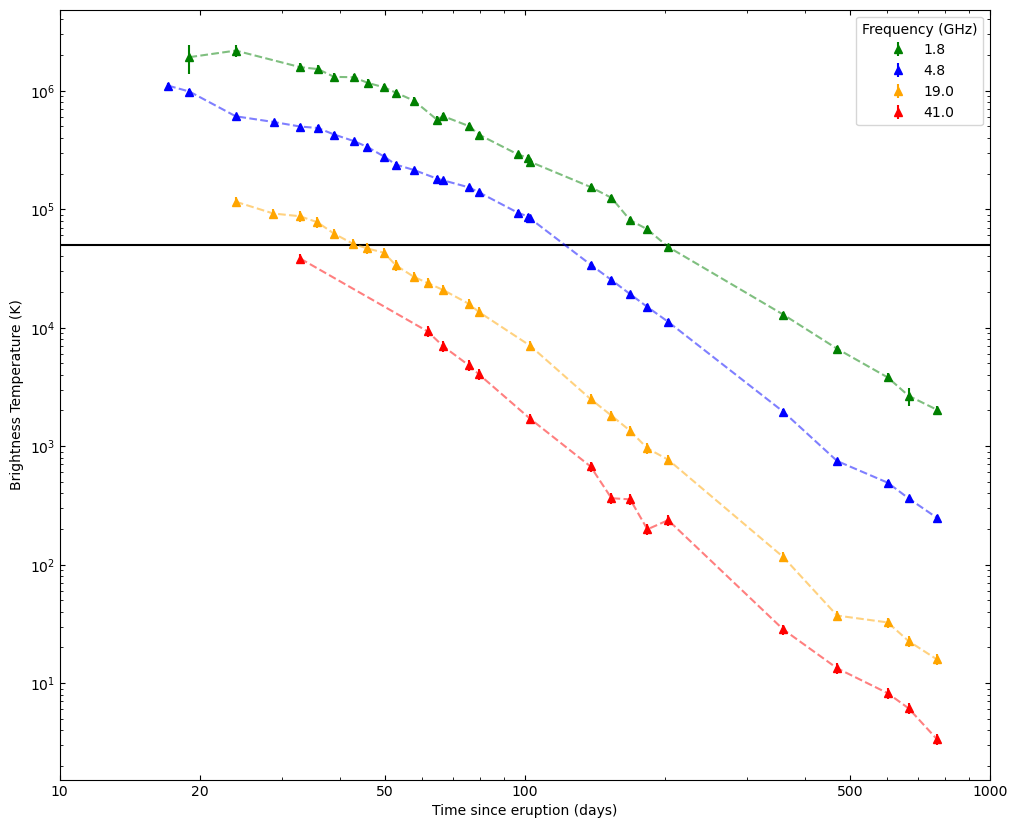

In [9]:

fig, ax = plt.subplots()
fig.set_size_inches(12,10)

ax.axhline(y=5*10**4, color='black', linestyle='-', linewidth=1.5)

#using a function to plot the detections only
# Store which labels have already been used
used_labels = set()

def plot(days, CTBs, CTBerrors, fluxes, errors, color, label_name):
    for day, CTB, CTBerr, flux, err in zip(days, CTBs, CTBerrors, fluxes, errors):
        if flux < 3 * err:
            fmt = 'x'  # square for non-detection
            label = None  # no label for non-detections
            ax.errorbar(day, CTB, fmt=fmt, color=color, label=label)
            
        else:
            fmt = '^'  # triangle for detection
            label = label_name if label_name not in used_labels else None
        
            ax.errorbar(day, CTB, yerr=CTBerr, fmt=fmt, color=color, label=label)
        
        if label:
            used_labels.add(label)


plot(days1_8, CTB_nu0, CTBError_nu0, flux1_8, flux_err1_8,'green', '1.8')
ax.plot(days1_8[0:27], CTB_nu0[0:27], color='green', linestyle = '--', alpha=.50)

plot(days4_8, CTB_nu1, CTBError_nu1, flux4_8, flux_err4_8,'blue', '4.8')
ax.plot(days4_8[0:30], CTB_nu1[0:30], color='blue', linestyle = '--', alpha=.50)

plot(days19, CTB_nu2, CTBError_nu2, flux19, flux_err19,'orange', '19.0')
ax.plot(days19[0:30], CTB_nu2[0:30], color='orange', linestyle = '--', alpha=.50)

plot(days41, CTB_nu3, CTBError_nu3, flux41, flux_err41,'red', '41.0')
ax.plot(days41[0:30], CTB_nu3[0:30], color='red', linestyle = '--', alpha=.50)

"""
ax.errorbar(days1_8, CTB_nu0, yerr=CTBError_nu0, fmt='^', color='green', label='1.8')
ax.plot(days1_8, CTB_nu0, color='green', linestyle = '--', alpha=.50)

ax.errorbar(days4_8, CTB_nu1, yerr=CTBError_nu1, fmt='^', color='blue', label='4.8')
ax.plot(days4_8, CTB_nu1, color='blue', linestyle = '--', alpha=.50)

ax.errorbar(days19, CTB_nu2, yerr=CTBError_nu2, fmt='^', color='orange', label='19.0')
ax.plot(days19, CTB_nu2, color='orange', linestyle = '--', alpha=.50)

ax.errorbar(days41, CTB_nu3, yerr=CTBError_nu3, fmt='^', color='hotpink', label='41.0')
ax.plot(days41, CTB_nu3, color='hotpink', linestyle = '--', alpha=.50)
"""


ax.set_xscale('log')
ax.set_xticks([10,20,50,100,500,1000], labels = ['10','20','50','100','500', '1000'])
ax.set_yscale('log')
#ax.set_yticks([.1,1,10], labels = ['0.1','1.0','10.0'])
ax.set_xlabel("Time since eruption (days)")
ax.set_ylabel("Brightness Temperature (K)")


ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax.set_title("")
plt.legend(title='Frequency (GHz)')
plt.show();